In [30]:
from typing import List, Tuple, Callable

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Supress numpy scientific notation
np.set_printoptions(suppress=True)

$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\yv}{\mathbf{y}}
 \newcommand{\zv}{\mathbf{z}}
 \newcommand{\uv}{\mathbf{u}}
 \newcommand{\vv}{\mathbf{v}}
 \newcommand{\tv}{\mathbf{t}}
 \newcommand{\bv}{\mathbf{b}}
 \newcommand{\av}{\mathbf{a}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Ym}{\mathbf{Y}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Wm}{\mathbf{W}}
 \newcommand{\Zm}{\mathbf{Z}}
 \newcommand{\Im}{\mathbf{I}}
 \newcommand{\Um}{\mathbf{U}}
 \newcommand{\Vm}{\mathbf{V}}
 \newcommand{\Am}{\mathbf{A}}
 \newcommand{\Ym}{\mathbf{Y}}
 \newcommand{\muv}{\boldsymbol\mu}
 \newcommand{\Sigmav}{\boldsymbol\Sigma}
 \newcommand{\Lambdav}{\boldsymbol\Lambda}
$

# Multi-Layer Neural Networks and Classification

In this module, we'll look at how we can generalize the 2 layer neural network code we wrote in the previous neural network module to work for any number of layers. Further, we'll take a look at how we can easily adapt neural networks to work for classification problems by using softmax regression.

## Table of notation

| Symbol                     | Meaning                     | Symbol    | Meaning                                                          |
|----------------------------|-----------------------------|-----------|------------------------------------------------------------------|
| $\xv$ or $\vec{x}$         | feature/input vector        | $x_i$     | $i$th element of $\xv$                                           |
| $\Xm$                      | input matrix                | $x_{i,j}$ | $i$th row and $j$th column of $\Xm$                              |
| $\yv$ or $\tv$             | labels/targets              | $n$       | number of features or columns 
| $\wv$ or $\mathbf{\theta}$ | weight/parameter vector     | $m$       | number of data samples <br>(also used to refer to the slope) |samples or rows                                   |
| $f$ or $h$                 | hypothesis function <br> (i.e., a model)        | $\hat{\yv}$ <br> $f(\xv {;} \wv)$<br>$h(\xv {;} \wv)$ | predictions <br> y-hat |
| $E$              | error or sum of error (loss)  | $SSE$      | sum of squared error function                                            |
| $MSE$                      | mean squared error| $\nabla$  | gradient (nabla)                                       |
| $\partial$                 | partial derivative          | $\alpha$  | learning rate (alpha)                                  |       
| $J$ | general placeholder for <br>the objective function | $x^T$| transpose of a vector or matrix |
$b$ | bias or y-intercept term | $T$ | Threshold |
$*$| element-wise<br> multiplication | $\cdot$ | dot product|
| $z$<br>$\zv$| value before applying activation function |  $X, Y$ | Random variables |
| $K$| number/set of classes | $k$ | current class|
| $MLE$|  maximum likelihood estimation | $ML$ |  maximum likelihood|
| $MLL$|  maximum log likelihood | $LL$ | log likelihood |
| $L$|  likelihood | $NLL$ | negative log likelihood |
| $g$ | activation function | $a$/$h$ <br> $\av/\mathbf{h}$<br>$\Am$/$\mathbf{H}$ | output of activation function <br> or neuron
$w$<br>$\wv$<br>$\Wm$ | weights| $z$<br>$\zv$<br>$\Zm$ | linear combination output|
|$\Wm^{[l]}$| $l$th layer weights| $\Am^{[l]}$| $l$th layer activations
|$\Zm^{[l]}$| $l$th layer linear combinations| $\bv^{[l]}$| $l$th layer bias

## Adding Multiple Layers

Now, as mentioned, the first goal of this module is to utilize multi-layer neural networks. The most basic multi-layer neural network would simply be a 3 layer neural network. A 3 layer neural network consists of 2 hidden layers and 1 output layer. Notice, we simply added an additional hidden layer. Let's say each hidden layer has 2 hidden neurons and the output layer has 1 neuron. Additionally, let's say that the input layer takes in data/inputs with 2 features. Below is the schematic of the described network.

<img src="https://live.staticflickr.com/65535/51992410531_2b4a6da0f5_h.jpg" width="2902" height="1039" alt="nn_3layer_1out">

Notice nothing nothing has really changed. All we did was add an additional hidden layer. Now we have 3 sets of weights and biases: one for 1st hidden, one for 2nd hidden layer, and one for the output layer. 

Thus, If we wanted to create a 5 layer neural network then we would have 4 hidden layers and 1 output layer where each hidden layer could have as many neurons as needed. Once again, depending on the number of predictions needed we could have as many output layer neurons as needed as well. As you can see generalizing a neural network to more hidden layers is rather trivial from the visual perspective. All we need to do is keep stacking layers with hidden neurons. 

### Why add more layers?

A major question is "why add more layers?" Well, the answer isn't as straight forward as one might hope as the answer relays more on empirical evidence (i.e., evidence gathered from running experiments comparing single and multi-layer networks) than theory. Further, this question is still an open research area, as research continues to investigate the benefits/disadvantages of single layer networks (i.e, shallow networks) and multi-layer networks (i.e., deep networks). 

First, you should know that a neural network with at least 1 hidden layer is considered a [universal approximator](http://neuralnetworksanddeeplearning.com/chap4.html). Theoretically, this means a neural network can approximate any continuous function. Keep in mind, this means a neural network with one hidden layer should be sufficient. All we need to do is determine the number of neurons that are needed for the given problem. Well, at least in theory.

Sadly, this theoretical idea turns out to be hard to actually achieve in the real would. One might even say this theory is almost "practically useless" as the number of neurons needed might be infeasibly large and the neural network may still even fail to generalize properly. 

So where does that leave us? Well, as of the current research, it turns out we can dramatically reduce the amount of neurons needed to represent a complex problem by stacking neurons in consecutive layers. Thus, adding hidden layers can still achieve the same "universal approximator" theory but with less neurons. Further, many empirical results show that stacking layers tends to lead to better generalization error (i.e., better generalization to unseen data).

Below are empirical results from [Goodfellow et al.](https://www.deeplearningbook.org/contents/mlp.html) which shows that as you increase the number of layers the test accuracy increases and then slowly begins to flatten out (i.e., diminishing returns).

<img src="https://www.researchgate.net/profile/Tugce-Karatas/publication/331165395/figure/fig2/AS:727499755487240@1550460866684/Empirical-results-showing-that-deeper-networks-generalize-better-when-used-to-transcribe.ppm">

## Multiple Outputs
Okay, we see that adding multiple layers isn't too complex of an idea,  visually that is. Now, what does adding multiple outputs look like? Recall, in the previous module we only worked with single outputs where the output layer only had 1 neuron. 

We can easily update our 3 layer neural network to have multiple outputs by simply adding as many output layer neurons as we want. Below is the schematic of our 3 layer neural network now with 3 outputs.

<img src="https://live.staticflickr.com/65535/51992688474_262f7ea332_h.jpg" width="2938" height="1216" alt="nn_3layer_3out">

Notice, each output neuron is now outputting a prediction $\hat{y}_i$.

### Why add more outputs?
The question you might be asking now is "why add more output neurons?" Well, for regression this question is harder to justify. Recall that for regression problems we typically want to predict a single continuous number, although this isn't always the case. Sometimes we might want to predict say an objects coordinates which would require our network to predict 2 or 3 continuous numbers depending on if the object is in 2D or 3D space.

However, multiple outputs really shine for classification problems. Recall back to the multi-class classification problem where the goal is to predict the label of a given class. Further recall that for logistic regression we needed multiple outputs in order to tackle multi-class classification problems. Well, the same idea applies to neural networks when tackling classification problems.

More specifically, we can utilize probabilistic classification where the goal is to predict the probability that a given data samples belongs to a class. Thus, if our data has 3 classes, we'd want to predict the probabilities for each of the 3 classes. This is a prime example of why multiple outputs might be needed. Let's take a closer look at how we can do this.

## Probabilistic Classification and Softmax Regression

Recall that for probabilistic classification the goal is to perform maximum likelihood estimation (MLE) as follows:

$$
\begin{align}
ML(w) &=  \arg \max_w P(y \mid \xv; w). \\
\end{align}
$$

To solve the MLE problem we can minimize the negative log likelihood (NLL) using the predicted probabilities of a data sample belonging to a class as follows:  

$$
NLL(\wv) = \min - \sum_{i=1}^{m} {\yv_i} * \log P(y_i \mid \xv_i; w) 
$$

Thus, in order to convert the continuous outputs of our neural network into probabilities, we can once again apply the softmax activation function as we did with logistic regression. Recall that the softmax equation is given as follows:

$$
\begin{align}
\hat{y}_\text{prob} = P(y \mid \xv; \wv) = \frac{e^{\zv_i}}{\sum_{k=1}^K e^{\zv_k}}
\end{align}
$$

Below is the schematic of our 3 layer neural network with 3 outputs and the softmax applied.

<img src="https://live.staticflickr.com/65535/51992410516_cc2e6fc2bc_h.jpg" width="3463" height="1402" alt="nn_3layer_3out_soft">

Now notice, the output neuron is broken into two parts. The first part computes the linear combination $z$ and the second part applies the softmax activation function to compute $a$. 

Furthermore, notice that each softmax activation requires a summation over ALL the linear combinations from EACH neuron in the output layer. This means, each output layer neuron requires access to the linear combination output of all other neurons in the same layer. This is why each linear combination in the output layer is connected to the activation of each output neuron. Keep in mind, these connections between linear combinations and activations contain NO WEIGHTS. We draw these connections to better visualize what is happening when we apply the softmax activation.

With the softmax added, we are now ready to tackle classification problems with neural networks.

## Notation Review
 Before moving into how generalize neural network code to multiple layers and how to code neural networks for classification, let's briefly review notation. We'll use the below neural network schematic to do so.

<img src="https://live.staticflickr.com/65535/51992410516_cc2e6fc2bc_h.jpg" width="3463" height="1402" alt="nn_3layer_3out_soft">

#### Superscript and subscript
Unless otherwise specified, superscript indicates the layer $a^{[1]}$ while subscript indicates the current neuron for neuron variables $w_1$/$a_1$/$z_1$ and the current feature for input features $x_1$. 

For instance, $a^{[1]}_2$ would be the activation for the 2nd neuron in 1st hidden layer. Likewise, $z^{[2]}_1$ would refer to the linear combination output for the 1st neuron in the 2nd hidden layer. Additionally, $a^{[3]}_1$ would be the activation for the 1st neuron in 3rd layer, in this case the output layer.

Throughout the notes we will use $z^{[\text{layer}]}$/$a^{[\text{layer}]}$/$w^{[\text{layer}]}$ where $\text{layer}$ refers to either a non-specific layer or the "current" layer in the network such that we can talk about the layers in a more general sense.

#### Weights $\Wm$ and Bias $\bv$
$w$ represents the weight for each neuron in a given layer where the weights are denoted by the connections between the inputs from the previous layer neurons and the current layer neurons. 

While not shown, each neuron in each layer has a bias term $b$. The bias term is added during the computations of the linear combinations $z$.

Recall, $w^{[\text{layer}]}_{\text{neuron}, \text{weight index}}$ is an individual weight for a neuron in a given layer where subscript here corresponds to the neuron and the weight index (i.e., the weight for a given input). $\wv$ or $\wv^{[\text{layer}]}_{\text{neuron}}$ represents the weight vector for EACH neuron such that the weight vector for the 1st layer and 1st neuron would be given as follows:

$$
\wv^{[1]}_1=  \begin{bmatrix}
                   w^{[1]}_{1,1}\\
                   w^{[1]}_{1,2}\\
             \end{bmatrix}
$$

Further, $\Wm^{[\text{layer}]}$ corresponds to a matrix of weights for the ENTIRE layer where the shape of the weight matrix is always (neurons, inputs). $\bv^{[\text{layer}]}$ then corresponds to a vector of biases for the entire layer where the shape of the bias vector is always (neurons, 1).

The weight and bias notation for the above neural network schematic corresponds to the following:

**Hidden layer 1 (layer 1)**

$$
\begin{align}
\Wm^{[1]} =\begin{bmatrix}
                       - \wv^{[1]\top}_1 -\\
                       - \wv^{[1]\top}_2 -\\
             \end{bmatrix} =  \begin{bmatrix}
                   w^{[1]}_{1,1} & w^{[1]}_{1,2} \\
                   w^{[1]}_{2,1} & w^{[1]}_{2,2} \\
             \end{bmatrix}
\end{align}
$$

$$
\begin{align}
\bv^{[1]} =\begin{bmatrix}
                       1 \\
                       1 \\
             \end{bmatrix} 
\end{align}
$$

**Hidden layer 2 (layer 2)**

$$
\begin{align}
\Wm^{[2]} =\begin{bmatrix}
                       - \wv^{[2]\top}_1 -\\
                       - \wv^{[2]\top}_2 -\\
             \end{bmatrix} =  \begin{bmatrix}
                   w^{[2]}_{1,1} & w^{[2]}_{1,2} \\
                   w^{[2]}_{2,1} & w^{[2]}_{2,2} \\
             \end{bmatrix}
\end{align}
$$

$$
\begin{align}
\bv^{[1]} =\begin{bmatrix}
                       1 \\
                       1 \\
             \end{bmatrix} 
\end{align}
$$


**Output layer (layer 3)**

$$
\begin{align}
\Wm^{[3]} =\begin{bmatrix}
                       - \wv^{[3]\top}_1 -\\
                       - \wv^{[3]\top}_2 -\\
                       - \wv^{[3]\top}_2 -\\
             \end{bmatrix} =  \begin{bmatrix}
                   w^{[3]}_{1,1} & w^{[3]}_{1,2} \\
                   w^{[3]}_{2,1} & w^{[3]}_{2,2} \\
                   w^{[3]}_{3,1} & w^{[3]}_{3,2} \\
             \end{bmatrix}
\end{align}
$$

$$
\begin{align}
\bv^{[3]} =\begin{bmatrix}
                       1 \\
                       1 \\
                       1 \\
             \end{bmatrix} 
\end{align}
$$


### Linear combination $\Zm$

Recall, $\Zm$ represents the linear combination output for MULTIPLE data samples and ALL neurons in a given layer. $\Zm$ has the shape (neurons, data samples). The equation for computing $\Zm$ for ALL neurons for a particular layer is given as follows:
$$
\Zm^{[\text{layer}]} = \Wm^{[\text{layer}]} \Am^{[\text{layer}-1]} + \bv^{[\text{layer}]}
$$
where $\Am^{[0]} = \Xm$.

**Hidden layer 1 (layer 1)**
$$
\Zm^{[\text{1}]} = \Wm^{[\text{1}]} \Am^{[0]} + \bv^{[1]}
$$
**Hidden layer 2 (layer 2)**
$$
\Zm^{[\text{2}]} = \Wm^{[\text{2}]} \Am^{[1]} + \bv^{[2]}
$$
**Output layer (layer 3)**
$$
\Zm^{[\text{3}]} = \Wm^{[\text{3}]} \Am^{[2]} + \bv^{[3]}
$$

### Activation $\Am$

Recall, $\Am$ represents the neuron activation output for MULTIPLE data samples and ALL neurons in the given layer. $\Am$ has the shape (neurons, data samples). The equation for computing $\Am$ for ALL neurons in a particular layer is given as follows:
$$
\Am^{[\text{layer}]} = g(\Zm^{[\text{layer}]})
$$

**Hidden layer 1 (layer 1)**
$$
\Am^{[\text{1}]} = g(\Zm^{[\text{1}]})
$$
**Hidden layer 2 (layer 2)**
$$
\Am^{[\text{2}]} = g(\Zm^{[\text{2}]})
$$
**Output layer (layer 3)**
$$
\Am^{[\text{3}]} = g(\Zm^{[\text{3}]})
$$

## Activation Functions
Below we redefine all the activation functions we saw in the previous module. The only new activation function will be the softmax function. As we'll see, there is a further caveat we'll need to address with computing the derivative of the softmax function.

### Softmax

Recall, the softmax activation function is an activation function that squashes values into probabilities such that the new values lie between 0 and 1 and the sum of all the new values is 1. 

Once again, the softmax equation is given as follows:

$$
\begin{align}
g(z)= \frac{e^{\zv_i}}{\sum_{k=1}^K e^{\zv_k}}
\end{align}
$$

The derivative of the softmax is actually rather complex as it depends on multiple linear combinations from multiple output neurons. To keep things simple, we can combine the softmax with the NLL to get a very easy to compute derivative. Instead of computing the derivative for the softmax and NLL separately we'll combine the softmax and NLL and then compute the derivative of the softmax and NLL together (we'll do something like [this](https://d2l.ai/chapter_linear-networks/softmax-regression.html#softmax-and-derivatives) shortly). Thus, we'll set the `derivative()` static method to return an array of 1s which acts as a placeholder derivative. When used in backpropagation, this will act as if no derivative was applied for the activation function.

Remember the code implementation the `activation()` static method will require you to subtract the max from each column of `z`. We do this to make the softmax function more numerically stable. See this [post](https://stackoverflow.com/a/49212689) to learn more! Lastly, notice we compute the max over `axis=0` and not `axis=1` this time. This is because $\Zm$ in neural networks has the shape (neurons, data samples) and we want to compute the max for each neuron.

In [31]:
class Softmax():
    @staticmethod
    def activation(z):
        z = z - np.max(z, axis=0, keepdims=True)
        e_z = np.exp(z)
        denominator = np.sum(e_z, axis=0, keepdims=True)

        return e_z / denominator
    
    @staticmethod
    def derivative(z):
        # placeholder derivative
        # THIS IS NOT THE ACTUAL DERIVATIVE OF THE SOFTMAX
        return np.ones(z.shape)

In [32]:
z = np.array([
    [5, 7, 10],
    [12, 3, 5]
]).T
print(f"z BEFORE softmax:\n{z.T}")
y_soft = Softmax.activation(z)
print(f"z AFTER softmax:\n{y_soft.T}")
print(f"z AFTER softmax sum:\n{y_soft.T.sum(axis=1, keepdims=True)}")

z BEFORE softmax:
[[ 5  7 10]
 [12  3  5]]
z AFTER softmax:
[[0.00637746 0.04712342 0.94649912]
 [0.99896578 0.00012328 0.00091094]]
z AFTER softmax sum:
[[1.]
 [1.]]


### Sigmoid

The sigmoid activation squashes values between 0 and 1 and is one of the first non-linear activation functions to be used. Recall, this is because it is the smooth version of the binary activation function used by Rosenblatt's perceptron.

While the sigmoid activation function is more biologically plausible, it actually doesn't work well in neural networks when we start adding more layers (unless you are using it as as the activation function for an output neuron to predict probabilities in binary classification). The issue here is two fold: 
1. The first issue is that the mean of the sigmoid function is 0.5. Recall, we like to standardize our data to have a mean of zero. One reason we do this is because it helps create smoother learning as values near zero produce more stable weight/gradient updates. Now, since the sigmoid has a mean of 0.5 this can be seen as "undoing" the standardization we performed on our data and creates more unstable gradients.
2. The second issue is referred to as saturating. What this means is that the output of the sigmoid gets saturated near the boundaries of the function which means the derivative is near zero. Thus, when learning the weights using gradient decent the derivative will be near zero and little to no learning will occur. Having the majority of your neurons with near zero gradients is particularly bad for neural networks as gradients are propagated through the entire network leading to a problem called the [*vanishing gradient problem*](https://en.wikipedia.org/wiki/Vanishing_gradient_problem).

Recall the sigmoid activation function equation is given as follows:

$$
\begin{align}
g(z) &= \frac{1}{1 + e^{-z}} \\
&= \frac{e^z}{1 + e^{z}}
\end{align}
$$

Further the derivative of the sigmoid activation is given as follows:

$$
\begin{align}
g'(z) &= \frac{1}{1 + e^{-z}} (1 - \frac{1}{1 + e^{-z}}) \\
&= g(z)(1- g(z))
\end{align}
$$


In [33]:
class Sigmoid():
    @staticmethod
    def activation(z):
        return 1 / (1 + np.exp(-z))
    
    @staticmethod
    def derivative(z):
        return Sigmoid.activation(z) * (1 -  Sigmoid.activation(z))

Below is the plot for the sigmoid activation function and the derivative of the sigmoid function for values between -10 and 10. 

Notice, as the sigmoid function (orange line) approaches 0 and 1 the derivative (blue line) goes to 0! Finally, note that the doted black line indicates the mean of the sigmoid function.

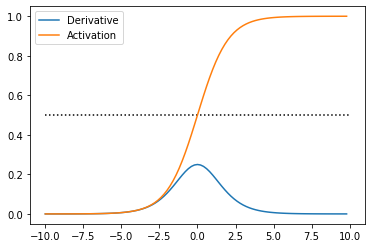

In [34]:
x = np.arange(-10, 10 , .2)
y = Sigmoid.activation(x)
dy = Sigmoid.derivative(x)

plt.hlines(.5, xmin=-10, xmax=10, colors='black', linestyles='dotted')
plt.plot(x ,dy, label='Derivative')
plt.plot(x ,y, label='Activation')
plt.legend()
plt.show();

### Tanh

The tanh is the evolution of the sigmoid function which squashes values between -1 and 1. Tanh acts almost identically to the sigmoid function, however the tanh activation function has a mean of 0. However, tanh, just like the sigmoid, suffers from the saturation problem where values at -1 and 1 have a near zero derivative. Regardless, when choosing between the sigmoid and tanh there is almost no reason to ever go with the sigmoid!

The tanh activation function equation is given as follows:

$$
\begin{align}
g(z) &= \tanh(z) \\
&= \frac{e^z - e^{-z}}{e^z + e^{-z}}
\end{align}
$$

Further, the derivative of the tanh activation is given as follows:

$$
\begin{align}
g'(z) &=  1 - \tanh^2(z)
\end{align}
$$


In [35]:
class Tanh():
    @staticmethod
    def activation(z):
        return np.tanh(z)
    
    @staticmethod
    def derivative(z):
        return 1 - np.tanh(z)**2

Below is the plot containing the tanh activation function and the derivative of the tanh function for values between -10 and 10. 

Notice, as the tanh function (orange line) approaches -1 and 1 the derivative (blue line) goes to 0! Finally, note that the doted black line indicates the mean of the tanh function.

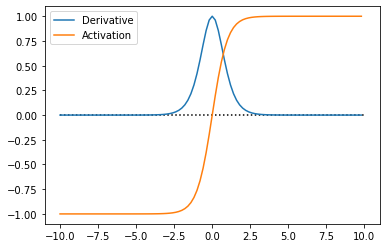

In [36]:
x = np.arange(-10, 10 , .2)
y = Tanh.activation(x)
dy = Tanh.derivative(x)

plt.hlines(0, xmin=-10, xmax=10, colors='black', linestyles='dotted')
plt.plot(x ,dy, label='Derivative')
plt.plot(x ,y, label='Activation')
plt.legend()
plt.show();

### ReLU

In order to address the issues of tanh and the sigmoid activation functions the *Rectified Linear Unit* (ReLU) which squashes values between 0 and infinity. The ReLU activation function was developed for its convenient mathematical properties which allow the gradient to be computed quickly. Furthermore, as we'll see shortly and in the deep learning section, ReLU is the go to activation function when stacking multiple hidden layers. That being said, ReLU still suffers from other issues such as the [*dying ReLU problem*](https://datascience.stackexchange.com/questions/5706/what-is-the-dying-relu-problem-in-neural-networks) and [exploding gradient](https://analyticsindiamag.com/can-relu-cause-exploding-gradients-if-applied-to-solve-vanishing-gradients/).

ReLU provides three main benefits:
1. It introduces sparsity such that some neurons can have a 0 activation where is a neuron is important for a given data sample it can be "silenced" or not activated.
2. It has much less likely to saturate as there is no positive value saturation point.
3. It is more computationally efficient the function is defined as $\max(0, z)$ meaning the output is either the value of $z$ or simply zero. Further, this makes the derivative a piecewise-function where the derivative is either 0 or 1.

The ReLU activation function equation is given as follows:

$$
\begin{align}
g(z) &= \max(0, z)\\
\end{align}
$$


The derivative of the ReLU activation is given as follows:

$$
\begin{align}
g'(z) &= \begin{cases}
    & 1 \quad  \text{if} \, z \ge 0\\
    & 0 \quad  \text{if} \, z < 0\\
\end{cases}
\end{align}
$$
Notice, that ReLU is actually a piecewise linear function. Keep in mind,  piecewise linear functions are actually non-linear which mean ReLU is still a non-linear function (see this [post](https://stackoverflow.com/questions/52446789/why-is-relu-a-non-linear-activation-function) for more details). Further, as the derivative at 0 is undefined, we can say if the derivative is greater than or equal to zero then the derivative is one. Likewise, we could say if the derivative is less than or equal to zero then the derivative is zero. Either option is valid.

In [37]:
class ReLU():
    @staticmethod
    def activation(z):
        return np.maximum(0, z)
    
    @staticmethod
    def derivative(z):
        z = z.copy()
        z[z>=0] = 1
        z[z<0] = 0
        return z

Below is the plot containing the ReLU activation function and the derivative of the ReLU function for values between -10 and 10. 

Notice, as the ReLU function (orange line) is a linear line up till zero where the line flattens and becomes equal to zero. Further, notice that the derivative (blue line) takes on values of either 0 or 1.

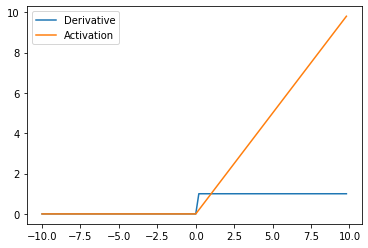

In [38]:
x = np.arange(-10, 10 , .2)
y = ReLU.activation(x)
dy = ReLU.derivative(x)

plt.plot(x ,dy, label='Derivative')
plt.plot(x ,y, label='Activation')
plt.legend()
plt.show();

## Toy Data and Plots
Below we define some the following functions:

- `plot_2D_data()` plots any 2D data for us.

- `plot_fill_decision_boundary()` plots the decision boundary for our neural network.

- `multi_class_data()` generates non-linear multi-class classification data which contains 3 classes. 

In [39]:
def plot_2D_data(
    X: np.ndarray, 
    y: np.ndarray,
    xlabel: str = '',
    ylabel: str = '',
    includes_bias=False, 
    class_names=None
):
    """ Function for plotting data """
    if class_names is None:
        class_names = {}
        
    class_labels = np.unique(y)
            
    if includes_bias:
        col_1, col_2 = 1, 2
    else:
        col_1, col_2 = 0, 1
    
    for l in class_labels:
        class_locs = np.where(y == l)[0]
        class_X = X[class_locs]
        class_name = class_names.get(l, f'class {l}')

        plt.scatter(
            class_X[:, col_1],
            class_X[:, col_2], 
            label=class_name,
            s=50,
            marker='.',
            alpha=.7)

    # Plot data
    plt.xlim([np.min(X[:, col_1])-.5, np.max(X[:, col_1])+.5])
    plt.ylim([np.min(X[:, col_2])-.5, np.max(X[:, col_2])+.5])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()

def plot_fill_decision_boundary(
    X: np.ndarray, 
    y: np.ndarray,
    predict: Callable,
    nn: list,
    xlabel: str = '',
    ylabel: str = '',
    includes_bias: bool = False,
    class_names=None
):
    """ Function for plotting the decision boundary of a classifier """
    if includes_bias:
        col_1, col_2 = 1, 2
    else:
        col_1, col_2 = 0, 1
        
    # Generate fake data to cover entire space of our input features X
    buffer = .5
    x_min, x_max = X[:, col_1].min() - buffer, X[:, col_1].max() + buffer
    y_min, y_max = X[:, col_2].min() - buffer, X[:, col_2].max() + buffer
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                         np.arange(y_min, y_max, .02))
    fake_data = np.c_[xx.ravel(), yy.ravel()].reshape(-1,2)

    # Make predictions for decision boundary
    fake_y_hat = predict(X=fake_data, nn=nn)

    # Plot decision boundary
    plt.contourf(xx, yy, fake_y_hat.reshape(xx.shape))
    # Plot data
    plot_2D_data(
        X, 
        y,
        xlabel=xlabel,
        ylabel=ylabel,
        includes_bias=includes_bias, 
        class_names=class_names)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

X shape: (500, 2)
y shape: (500, 1)


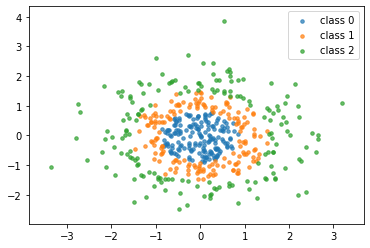

In [40]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.preprocessing import StandardScaler

def multi_class_data(
    n_samples: int = 500, 
    classes=3,
    seed: int = 42
) -> List[np.ndarray]:
    """ Genertes multi-class non-linear data """
    X, y = make_gaussian_quantiles(cov=1, 
                                   n_samples=n_samples, 
                                   n_features=2, 
                                   n_classes=classes, 
                                   random_state=seed)
    ss = StandardScaler()
    X = ss.fit_transform(X)
    return X, y.reshape(-1, 1)
    
X, y = multi_class_data()
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
plot_2D_data(X, y)
plt.show()

# Implementing Multi-Layer Neural Networks

Now let's look at the code for generalizing the neural network algorithm to multiple layers and classification problems.

## Layer class
**`Layer` overview**

First, we need to start by defining a `Layer` class. Doing so will help our code to be more easily generalizable and organized  going forward. The `Layer` class will keep track of the number of neurons, number of inputs, weights, biases, activation function, linear combination output, and activation output for a given layer.

Before moving on, read the documentation for the attributes in the `Layer` class below. The only method the `Layer` class has is the `print_info()` method which will print a summary of all attributes contained within the class.

In [41]:
class Layer():
    """Class for all variables required by a layer
    
        Attributes:
            W: NumPy array of weights for all neurons in the layer
            
            b: NumPy array of biases for all neurons in the layer
            
            g: Activation function for all neurons in the layer
            
            name: Name of the layer
            
            neurons: Number of neurons in the layer
            
            inputs: Number of inputs into the layer
            
            Z: Linear combination of weights and inputs for all neurons. 
                Initialized to an empty array until it is computed and set.
                
            A: Activation output for all neurons. Initialized to an empty 
                array until it is computed and set.
    """
    def __init__(
        self, 
        W:np.array, 
        b:np.array, 
        g: object, 
        name: str="Layer"
    ):
        self.W = W
        self.b = b
        self.g = g
        self.name = name 
        self.neurons = len(W)
        self.inputs = W.shape[1]
        self.Z = np.array([])
        self.A = np.array([])
    
    def print_info(self):
        """ Prints infor for all class attributes """
        print(f"{self.name}")
        print(f"\tNeurons: {self.neurons}")
        print(f"\tInputs: {self.inputs}")
        print(f"\tWeight shape: {self.W.shape}")
        print(f"\tBias shape: {self.b.shape}")
        print(f"\tActivation function: {self.g.__name__}")
        print(f"\tZ shape: {self.Z.shape}")
        print(f"\tA shape: {self.A.shape}")

## Initializing weights and biases
#### `init_weights()` overview

The first thing we need to do now is initialize the weights and biases.

We start by defining the `init_weights()`. This function takes in the number of neurons and inputs for a given layer and returns an array of randomly uniformly initialized weights between -.5 and.5 with the shape (neurons, inputs).

In [42]:
def init_weights(neurons: int, inputs: int):
    """ Initializes weight values using random uniform distribution
    
        Args:
            neurons: Number of neurons in the layer
            
            inputs: Number of inputs to the layer
    """
    return np.random.uniform(low=-0.5, high=0.5, size=(neurons, inputs))

#### `init_neural_network()` overview

Next, we define the `init_neural_network()` function which initializes the weights and biases for each layer and then creates an instance of the `Layer` class, defined below, which stores the corresponding weights and biases for each layer. 

Before moving on, read the  documentation for the arguments in the `init_neural_network()`. Notice, that the structure of the network is determined by the argument `neurons_per_layer` which determines not only the number of neurons per layer but how many layers will be in the network. 

The `init_neural_network()` function returns a list of `Layer` instances where each element is an instance of a `Layer` class and corresponds to different layers in the defined neural network.

#### `init_neural_network()` breakdown

```Python
for l, neurons in enumerate(neurons_per_layer):
```

This is the for-loop which loops over the argument `neurons_per_layer`. As the `neurons_per_layer` argument is a list of integers where each element corresponds to the number of neurons in the layer such that the total number of elements corresponds to the total number of layers one wishes to create a neural network with. Further, the last element always corresponds to the number of neurons in the output layer. 

For example, `neurons_per_layer=[2, 3]` would create a 2 layer neural network where the hidden layer has 2 neurons and the output layer has 3 neurons.

`neurons` here corresponds to the number of neurons to be used in the current layer and `l` corresponds the current index of `neurons_per_layer` which is used to index the number of neurons in previous layers. 


```Python
if l == 0:
    inputs = n_input_features
else:
    inputs = neurons_per_layer[l-1]
```

These lines are used to determine what the inputs of the current layer should be. If current layer is the 1st hidden layer `l==0` then the inputs should correspond to the number of input features given by the `n_input_features` argument. Otherwise, the inputs should correspond to the previous layer's number of neurons.  

```Python
if l == len(neurons_per_layer)-1:
    g = g_output
    name = f"Layer {l+1}: Output Layer"
else:
    g = g_hidden
    name = f"Layer {l+1}: Hidden Layer"
```

These lines are used to set the activation functions and the names of each layer (recall that the `Layer` class takes an argument `name` which allows you to name a layer). If the current layer corresponds to the output layer `l == len(neurons_per_layer)-1` then the output activation function stored in `g_output` is used for `g` and `name` is set to represent the output layer. Otherwise, the hidden layer activation function stored in `g_hidden` is used for `g` and `name` is set to represent the current hidden layer number.

```Python
W = init_weights(neurons, inputs)
b = np.ones([neurons, 1])
```
Next, the weights and biases are initialized. `W` is initialized with shape (neurons, inputs) based on the `neurons` and `inputs` variables which are passed to the `init_weights()` function described above. `b` is initialized to be a column vector of ones with shape (neurons, 1).

```Python
layer = Layer(W=W, b=b, g=g, name=name)
nn.append(layer)
```

Finally, we initialize an instance of the `Layer` class to represent the current layer by passing it the weights `W`, biases `b`, activation function `g`, and the name of the layer `name`. The layer instance is then appended to `nn` which contains the list of layers (i.e., `Layer` class instances) for our neural network.

In [43]:
def init_neural_network(
    n_input_features: int, 
    neurons_per_layer: List[int], 
    g_hidden: object, 
    g_output: object, 
    seed: int = 0
)-> List[Layer]:
    """ Initializes weights and biases for a multi-layer neural network 
    
        Args:
            n_input_features: Number of features the input data has
            
            neurons_per_layer: A list where each element represents 
                the neurons in a layer. For example, [2, 3] would
                create a 2 layer neural network where the hidden layer
                has 2 neurons and the output layer has 3 neurons.
                
            g_hidden: Activation function used by ALL neurons 
                in ALL hidden layers.
                
            g_output: Activation function used by ALL neurons
                in the output layer.
                
            seed: Determines global seed to use when initalizing 
                weights.
    """
    nn = []
    np.random.seed(seed)
    for l, neurons in enumerate(neurons_per_layer):
        # Set inputs to number of input features
        # for the first hidden layer
        if l == 0:
            inputs = n_input_features
        else:
            inputs = neurons_per_layer[l-1]
        
        # Set activation functions for the output
        # layer neurons and set the names of the nn
        if l == len(neurons_per_layer)-1:
            g = g_output
            name = f"Layer {l+1}: Output Layer"
        else:
            g = g_hidden
            name = f"Layer {l+1}: Hidden Layer"
        
        # Init weights and biases
        W = init_weights(neurons, inputs)
        b = np.ones([neurons, 1])
        
        # Init instance of Layer class to hold weights, biases,
        # activations, and a layer name.
        layer = Layer(W=W, b=b, g=g, name=name)
        nn.append(layer)
        
    return nn

Below we initialize our neural network `nn` based on our 3 layer neural network for classification given below. Notice we have 2 hidden layers with 2 hidden units each that all use the sigmoid activation function. Furthermore, we the output layer has 3 neurons and each neuron uses the softmax activation function.

<img src="https://live.staticflickr.com/65535/51992410516_cc2e6fc2bc_h.jpg" width="3463" height="1402" alt="nn_3layer_3out_soft">

In [44]:
neurons_per_layer = [2 ,2 ,3]
g_hidden = Sigmoid
g_output = Softmax

nn = init_neural_network(
    n_input_features=X.shape[1], 
    neurons_per_layer=neurons_per_layer,
    g_hidden=g_hidden,
    g_output=g_output
)=

Below is the output of the `init_neural_network()` function. Notice, it is a list of `Layer` class instances where we have 3 layers: one for the 1st hidden layer, one for the 2nd hidden layer, and one for the output layer. These layers are given in order from 1st hidden layer to output layer.

In [45]:
nn

We can loop over all the `Layer` class instances in `nn` to print the attribute information using the `print_info()` method. Notice, the 1st hidden layer corresponds to element 0, the 2nd hidden layer corresponds to element 1, and the output layer corresponds to element 2. Lastly, notice, `Z`, the linear combination of weights and inputs, and `A`, the output of the neuron, for each layer are empty arrays as they have not yet been computed. Recall, these will be compute during the forward pass!

In [46]:
for layer in nn:
    layer.print_info()

Layer 1: Hidden Layer
	Neurons: 2
	Inputs: 2
	Weight shape: (2, 2)
	Bias shape: (2, 1)
	Activation function: Sigmoid
	Z shape: (0,)
	A shape: (0,)
Layer 2: Hidden Layer
	Neurons: 2
	Inputs: 2
	Weight shape: (2, 2)
	Bias shape: (2, 1)
	Activation function: Sigmoid
	Z shape: (0,)
	A shape: (0,)
Layer 3: Output Layer
	Neurons: 3
	Inputs: 2
	Weight shape: (3, 2)
	Bias shape: (3, 1)
	Activation function: Softmax
	Z shape: (0,)
	A shape: (0,)






## Multi-Layer feed-forward: making predictions 

Time to use our new neural network code to perform the feed-forward process. The forward pass or feed-forward process is relatively simple. Recall, every layer uses the same 2 equations to compute the linear combinations $\Zm$ and activation outputs $\Am$.
$$
\Zm^{[\text{layer}]} = \Wm^{[\text{layer}]} \Am^{[\text{layer}-1]} + \bv^{[\text{layer}]}
$$

$$
\Am^{[\text{layer}]} = g(\Zm^{[\text{layer}]})
$$
where $\Am^{[0]} = \Xm$.

#### `forward()` overview

We define the `forward()` which applies the above two equations for each layer in our neural network by looping over the list of `Layer` class instances stored in `nn`. Additionally, the loop sets the linear combination variable `linear.Z` and activation output variable `linear.A` for each layer.

Before moving on, read the documentation for the `forward()` function.

#### `forward()` breakdown
```Python
A = X.T
```
The first line transpose the input features `X` to be of shape (features, data samples) which is the shape our neural network requires! Further, we store the input of each layer into the variable `A`. Since the inputs features `X.T` are the inputs of the 1st hidden layer, we initialize `A` with `A = X.T`.
<hr>

```Python
for l, layer in enumerate(nn):
```
This line loops over the elements in `nn`. This means, we are looping over each layer starting from the 1st hidden layer and ending with the output layer. `layer` corresponds to the current `Layer` class instance while `l` corresponds to the index position of the current `Layer` class instance inside `nn`.
<hr>

```Python
layer.Z = layer.W @ A + layer.b
layer.A = layer.g.activation(layer.Z)
```
These lines compute the linear combinations $\Zm^{[\text{layer}]}$ and activation outputs $\Am^{[\text{layer}]}$ for the current layer. The following is how each code variable maps to the variables in the equations: 
- `layer.W` corresponds to $\Wm^{[\text{layer}]}$
- `layer.b` corresponds to $\bv^{[\text{layer}]}$
- `A` corresponds to $\Am^{[\text{layer}-1]}$ and represents the current layer's input (i.e., the previous layer's output)
- `layer.Z` corresponds to $\Zm^{[\text{layer}]} $
- `layer.g.activation(layer.Z)` corresponds to $g(\Zm^{[\text{layer}]})$
- `layer.A` corresponds to $\Am^{[\text{layer}]} $ the output of the current layer

<hr>

```Python
A = layer.A
```
This is where we update `A` which represents the input for the next layer. We do so by setting it equal to the output of the current layer `layer.A`.
<hr>

```Python
y_hat_prob = A.T
```
Once the loop is done, `A` will be storing the output of the network (you can also think about this as the input for the loss function). Recall, `A` here has shape (neurons, data samples) so we need to transpose it to get (data samples, neurons) which matches the ground truth shape for `y` which is (data samples, classes). Remember the output layer has a neuron for each class such that the number output layer neurons equals the number of classes.

In [47]:
def forward(X:np.ndarray, nn: List[Layer], verbose: bool = False):
    """ Performs the forward pass for a multi-layer neural network
    
        Args:
            X: Input features. This should be typically be the 
                training data.
            
            nn: List of Layer class instances which together 
                define a nueral network. 
            
            verbose: If True then information regarding eqation shapes
                will be printed for each layer.
    
    """
    A = X.T
    for l, layer in enumerate(nn):
        layer.Z = layer.W @ A + layer.b
        layer.A = layer.g.activation(layer.Z)
        A = layer.A
        # Shape print statements for each equation
        if verbose:
            print(f"Z{l+1}{layer.Z.shape} = W{l+1}{layer.W.shape} @ A{l}{A.shape} + b{l+1}{layer.b.shape}")
            print(f"A{l+1}{layer.A.shape} = g(Z{l+1}{layer.Z.shape})")
        
    y_hat_probs = A.T
    return y_hat_probs

Below is how we run the function `forward()` where we reinitialize the weights and pull the data to keep this cell consistent when rerunning multiple time.

Notice, we added some useful print statements which print the shapes of all the variables and their corresponding variable name and layer number. For example, "W1" in the print statements corresponds to the weights for the 1st hidden layer and "A0" corresponds to the input features which act as inputs for the 1st hidden layer. Thus, the number after each variable corresponds to the layer number.

In [48]:
X, y = multi_class_data()

nn = init_neural_network(
    n_input_features=X.shape[1], 
    neurons_per_layer=neurons_per_layer,
    g_hidden=g_hidden,
    g_output=g_output
)

y_hat_probs = forward(X, nn, verbose=True)

Z1(2, 500) = W1(2, 2) @ A0(2, 500) + b1(2, 1)
A1(2, 500) = g(Z1(2, 500))
Z2(2, 500) = W2(2, 2) @ A1(2, 500) + b2(2, 1)
A2(2, 500) = g(Z2(2, 500))
Z3(3, 500) = W3(3, 2) @ A2(3, 500) + b3(3, 1)
A3(3, 500) = g(Z3(3, 500))


Below we can see the output transformed by the softmax activation function giving us the probability that each data sample belongs to a given class.

In [49]:
y_hat_probs

array([[0.3204448 , 0.31577886, 0.36377634],
       [0.32048925, 0.31577841, 0.36373234],
       [0.32042429, 0.31576635, 0.36380936],
       ...,
       [0.3203073 , 0.31569646, 0.36399624],
       [0.32050693, 0.31578435, 0.36370872],
       [0.32050588, 0.31579209, 0.36370203]])

Further, we can see the sum of each row is 1 as expected as each columns represent the probability the data sample belongs to a class and the sum of probabilities must equal 1.

In [50]:
y_hat_probs.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

If we loop over all the `Layer` class instances in `nn` to print the attribute information using the `print_info()` method again we can see that `Z` and `A` have been set for each layer!

In [51]:
for layer in nn:
    layer.print_info()

Layer 1: Hidden Layer
	Neurons: 2
	Inputs: 2
	Weight shape: (2, 2)
	Bias shape: (2, 1)
	Activation function: Sigmoid
	Z shape: (2, 500)
	A shape: (2, 500)
Layer 2: Hidden Layer
	Neurons: 2
	Inputs: 2
	Weight shape: (2, 2)
	Bias shape: (2, 1)
	Activation function: Sigmoid
	Z shape: (2, 500)
	A shape: (2, 500)
Layer 3: Output Layer
	Neurons: 3
	Inputs: 2
	Weight shape: (3, 2)
	Bias shape: (3, 1)
	Activation function: Softmax
	Z shape: (3, 500)
	A shape: (3, 500)


Lastly, we redefine NLL loss function in the the `nll()` function along with a simple `onehot()` function which converts the labels `y` into a one-hot encodings.

In [52]:
def nll(y, y_hat_probs):
    loss = y * np.log(y_hat_probs)
    cost = -np.sum(loss)
    return cost

def onehot(y):
    n_values = np.max(y) + 1
    oh = np.eye(n_values)[y.flatten()]
    return oh

As we can see, after the forward pass the average NLL loss is ~1.1.

In [53]:
y_oh = onehot(y)
avg_nll = nll(y_oh, y_hat_probs) / len(y)
avg_nll

1.1003116131006037

## Multi-Layer Feedback: Backpropagation 

Moving on to generalizing the backpropagation code things begin to get slightly more ugly and complex. If you haven't, please review the *Backpropagation* section from the notes *Neural Networks: Regression* as we'll be assuming you have an idea of the notation and a gernal idea of how backpropagation works.

### Deriving softmax and negative log likelihood together
Before we even get started on backpropagation let's go ahead an address this weirdness with the softmax and negative log likelihood derivatives. There isn't space nor time to go into the specifics so we'll be as brief as possible. 

The reason why we did not compute the derivative of the softmax when we defined `Softmax` class above is because, as previously mentioned, computing the derivative of the softmax, on its own, is rather complex. The derivate of the softmax actually has two cases where the derivative differs depending on th case. 

However, we can get around need to solve for both cases by simply plugging in the softmax into the NLL loss function. For a single data sample the NLL loss would then look as follows:

$$
NLL= -\yv \log \frac{e^{\hat{y}_{\text{prob}, i}}}{\sum_{k=1}^K e^{\hat{y}_{\text{prob}, k}}}
$$
where $\hat{y}_{\text{prob}, i} = a^{[3]}_i = z^{[3]}_i$ in our 3 layer neural network and $i$ represents the current output neuron and $K$ is equal to the total number of output neurons.

By taking the derivative of the above equation we get the following:

$$
\frac{d NLL}{d \hat{\yv}_{\text{prob}}} = (\hat{\yv}_{\text{prob}} - \yv) 
$$
where $\hat{\yv}_\text{prob}$ is the set of output probabilities for a single data sample and $\yv$ is a one-hot encoded vector.

Once again, we if compute the derivative of the NLL loss and softmax separately we would have a much more complex set of derivatives on our hands. For now, just keep this in mind as this is why we don't compute the softmax derivative directly. Recall, we set `derivative()` static method for `Softmax` class to only return an array of ones. We do this as we don't need to account for the derivative of the softmax activation when computing it's partial derivative as we have already done so when computing the partial derivative of the loss!

Below is the `delta_softmax_nll()` function which returns the derivative of the softmax and NLL loss taken together.

In [54]:
def delta_softmax_nll(y, y_hat_probs):
    return (y_hat_probs - y)

### Finding a pattern

Our goal to write general backpropagation code is to find a pattern in the partial derivatives that will allow us to compute the gradients of each layer no matter how many layers we have.

Let's start by looking at how we would compute the gradients for all the weights and biases in our 3 layer neural network. Using the NLL loss function as the parent or root equation, we'll need to compute the partial derivatives of NLL with respect to the following parameters: $\frac{\partial NLL}{\partial \Wm^{[3]}}$, $\frac{\partial NLL}{\partial \bv^{[3]}}$, $\frac{\partial NLL}{\partial \Wm^{[2]}}$, $\frac{\partial NLL}{\partial \bv^{[2]}}$, $\frac{\partial NLL}{\partial \Wm^{[1]}}$, and $\frac{\partial NLL}{\partial \bv^{[1]}}$.

Our best option to find a pattern is to expand each one of these partial derivatives and see if we can see any terms that are repeatedly used. Below is the expansion for all the partial derivatives for the weights and biases starting from the output layer and ending with the 1st hidden layer.

$$
\begin{align}
\frac{\partial NLL}{\partial \Wm^{[3]}} &= \frac{\partial NLL}{\partial \Am^{[3]}}\frac{\partial \Am^{[3]}}{\partial \Zm^{[3]} }\frac{\partial \Zm^{[3]} }{\partial  \Wm^{[3]} } \\
\frac{\partial NLL}{\partial \bv^{[3]}} &= \frac{\partial NLL}{\partial \Am^{[3]}}\frac{\partial \Am^{[3]}}{\partial \Zm^{[3]} }\frac{\partial \Zm^{[3]} }{\partial  \bv^{[3]} } \\
\\
\frac{\partial NLL}{\partial \Wm^{[2]}} &= \frac{\partial NLL}{\partial \Am^{[3]}}\frac{\partial \Am^{[3]}}{\partial \Zm^{[3]} }\frac{\partial \Zm^{[3]} }{\partial  \Am^{[2]} } \frac{\partial \Am^{[2]}}{\partial \Zm^{[2]} } \frac{\partial \Zm^{[2]}}{\partial \Wm^{[2]} } \\
\frac{\partial NLL}{\partial \bv^{[2]}} &= \frac{\partial NLL}{\partial \Am^{[3]}}\frac{\partial \Am^{[3]}}{\partial \Zm^{[3]} }\frac{\partial \Zm^{[3]} }{\partial  \Am^{[2]} } \frac{\partial \Am^{[2]}}{\partial \Zm^{[2]} } \frac{\partial \Zm^{[2]}}{\partial \bv^{[2]} } \\
\\
\frac{\partial NLL}{\partial \Wm^{[1]}} &= \frac{\partial NLL}{\partial \Am^{[3]}}\frac{\partial \Am^{[3]}}{\partial \Zm^{[3]} }\frac{\partial \Zm^{[3]} }{\partial  \Am^{[2]} } \frac{\partial \Am^{[2]}}{\partial \Zm^{[2]} } \frac{\partial \Zm^{[2]}}{\partial \Am^{[1]} } \frac{\partial \Am^{[1]}}{\partial \Zm^{[1]} }\frac{\partial \Zm^{[1]}}{\partial \Wm^{[1]} } \\
\frac{\partial NLL}{\partial \bv^{[1]}} &= \frac{\partial NLL}{\partial \Am^{[3]}}\frac{\partial \Am^{[3]}}{\partial \Zm^{[3]} }\frac{\partial \Zm^{[3]} }{\partial  \Am^{[2]} } \frac{\partial \Am^{[2]}}{\partial \Zm^{[2]} } \frac{\partial \Zm^{[2]}}{\partial \Am^{[1]} } \frac{\partial \Am^{[1]}}{\partial \Zm^{[1]} }\frac{\partial \Zm^{[1]}}{\partial \bv^{[1]} } \\
\end{align}
$$

Notice any patterns or shared terms? If not, let's breakdown the patterns and shared terms one at a time.

#### Pattern 1

Notice that the first pattern is a set shared terms which are shared by  ALL parameter gradient equations. That is, solving for the gradient for every parameter requires the following terms:

$$
\frac{\partial NLL}{\partial \Am^{[3]}}\frac{\partial \Am^{[3]}}{\partial \Zm^{[3]}}
$$

#### Pattern 2

Notice that the second pattern is a set shared terms which are shared by ALL parameter gradient equations EXCEPT for the output layer. These shared terms are: 

$$
\frac{\partial \Zm^{[3]} }{\partial \Am^{[2]}} \frac{\partial \Am^{[2]}}{\partial \Zm^{[2]} }
$$

#### Pattern 3
Notice that if we had more layers, the third pattern would be a set shared terms which are shared by ALL parameter gradient equations EXCEPT for the output layer and last hidden layer. These shared terms are: 
$$
 \frac{\partial \Zm^{[2]}}{\partial \Am^{[1]}} \frac{\partial \Am^{[1]}}{\partial \Zm^{[1]} }
$$

#### General idea

Thus, here the terms $\frac{\partial NLL}{\partial \Am^{[3]}}$, $\frac{\partial \Zm^{[3]} }{\partial \Am^{[2]}}$, and $ \frac{\partial \Zm^{[2]}}{\partial \Am^{[1]}}$ correspond to the partial derivative for a layer's linear combination with respect to the input of said layer (i.e., the previous layer's output). The slight exception to this interpretation is $\frac{\partial NLL}{\partial \Am^{[3]}}$ which corresponds to the partial derivative of the loss function with respect to the output of the network. However, if we think of the loss function as a layer without weights that takes the output layer's outputs as inputs, this interpretation makes slightly more sense.


Meanwhile, the terms $\frac{\partial \Am^{[3]}}{\partial \Zm^{[3]}}$, $\frac{\partial \Am^{[2]}}{\partial \Zm^{[2]} }$, and $\frac{\partial \Am^{[1]}}{\partial \Zm^{[1]}}$ correspond to the partial derivative of the a layer's activation function with respect to the layer's linear combination.

Using these shared terms we can build any partial derivative for any layer. Notice, only the partial derivative for the current layer's weights $\frac{\partial \Zm^{[\text{layer}]}}{\partial \Wm^{[\text{layer}]}}$ and biases $\frac{\partial \Zm^{[\text{layer}]}}{\partial \bv^{[\text{layer}]}}$ need to be computed specifically for the current layer.

### General backpropagation algorithm
In this section, we cover the generalized backpropagation by breaking the general backpropagation idea into steps where each step corresponds to computing the weight and bias gradients for a given layer. Recall backpropagation starts with the output layer and ends with the 1st hidden layer. 

**Step 1: Using pattern 1**

Starting with the output layer, we can to compute the partial derivative of NLL with respect to $\Zm^{[3]}$ using our first shared terms $\frac{\partial NLL}{\partial \Am^{[3]}}\frac{\partial \Am^{[3]}}{\partial \Zm^{[3]}}$.

$$
\begin{align}
\frac{\partial NLL}{\partial \Zm^{[3]}} &= \frac{\partial NLL}{\partial \Am^{[3]}}^\top \frac{\partial \Am^{[3]}}{\partial \Zm^{[3]}} \\
&= (\hat{\Ym}_{\text{prob}} - \Ym)^\top * g'(\Zm^{[3]})
\end{align}
$$
where $g'(\Zm^{[3]})$ is the derivative of the activation function for output layer's neurons. Remember, for us, this would be the softmax function where $g'(\Zm^{[3]}) = \mathbf{1}$ because we combine the softmax and NLL and took their derivative together at once, so computing the derivative of the softmax again would be incorrect. Therefore, we set the softmax derivative to be a column vectors of 1s such that it WILL NOT influence our gradient equations! Finally, note $\hat{\Ym}_{\text{prob}}$ and $\Ym$ are matrices because $\hat{\Ym}_{\text{prob}}$ contains multiple data samples and predicted probabilities for each class while $\Ym$ contains one-hot encodings for multiple data samples.

Using $\frac{\partial NLL}{\partial \Zm^{[3]}}$  we can compute the gradients for the weights $\Wm^{[3]}$ and biases $\bv^{[3]}$ as follows:

$$
\begin{align}
\frac{\partial NLL}{\partial \Wm^{[3]}} &= \frac{\partial NLL}{\partial \Zm^{[3]}} \cdot \frac{\partial \Zm^{[3]}}{\partial \Wm^{[3]}} ^\top  \\
&= \frac{\partial NLL}{\partial \Zm^{[3]}} \cdot \Am^{[2]\top},
\end{align}
$$

$$
\begin{align}
\frac{\partial NLL}{\partial \bv^{[3]}} &= \frac{\partial NLL}{\partial \Zm^{[3]}} \cdot \frac{\partial \Zm^{[3]}}{\partial \bv^{[3]}}^\top  \\
&= \frac{\partial NLL}{\partial \Zm^{[3]}}  \cdot \mathbf{1}^\top.
\end{align}
$$

Finally, we can compute the partial derivative of NLL with respect to $\Am^{[2]}$ by taking the dot product between $\frac{\partial NLL}{\partial \Zm^{[3]}}$ and $\frac{\partial \Zm^{[3]}}{\partial \Am^{[2]}}$ as given:

$$
\begin{align}
\frac{\partial NLL}{\partial \Am^{[2]}}& = \frac{\partial \Zm^{[3]}}{\partial \Am^{[2]}} ^\top \cdot \frac{\partial NLL}{\partial \Zm^{[3]}} \\
&= \Wm^{[3]\top} \cdot \frac{\partial NLL}{\partial \Zm^{[3]}}
\end{align}
$$
where $\frac{\partial NLL}{\partial \Am^{[2]}}$ will be passed on and utilized by the next layer's gradient equations. **Now here is the big idea, pattern, or trick. Notice, for this and proceeding steps we always pass on the partial derivative of the NLL with respect to the current layers input's (i.e., previous layer's outputs) $\frac{\partial NLL}{\partial \Am^{[\text{layer-1}]}}$ to the next layer in the backpropagation process!**

**Step 2: Using pattern 2**

Moving onto the 2nd or last hidden layer, we can to compute the partial derivative of NLL with respect to $\Zm^{[2]}$ using $\frac{\partial NLL}{\partial \Am^{[2]}}$ from the previous layer and $\frac{\partial \Am^{[2]}}{\partial \Zm^{[2]}}$ from the current layer.
$$
\begin{align}
\frac{\partial NLL}{\partial \Zm^{[2]}} &= \frac{\partial NLL}{\partial \Am^{[2]}}\frac{\partial \Am^{[2]}}{\partial \Zm^{[2]}} \\
&=   \frac{\partial NLL}{\partial \Am^{[2]}} * g'(\Zm^{[2]})
\end{align}
$$
where $g'(\Zm^{[2]})$ is the derivative of the activation function for last hidden layer's neurons which is the derivative of the sigmoid activation function.

Using $\frac{\partial NLL}{\partial \Zm^{[2]}}$  we can compute the gradients for the weights $\Wm^{[2]}$ and biases  $\bv^{[2]}$ as follows:

$$
\begin{align}
\frac{\partial NLL}{\partial \Wm^{[2]}} &= \frac{\partial NLL}{\partial \Zm^{[2]}} \cdot \frac{\partial \Zm^{[2]}}{\partial \Wm^{[2]}}^\top \\
&= \frac{\partial NLL}{\partial \Zm^{[2]}} \cdot \Am^{[1]\top},
\end{align}
$$

$$
\begin{align}
\frac{\partial NLL}{\partial \bv^{[2]}} &= \frac{\partial NLL}{\partial \Zm^{[2]}} \cdot  \frac{\partial \Zm^{[2]}}{\partial \bv^{[2]}}^\top \\
&= \frac{\partial NLL}{\partial \Zm^{[2]}} \cdot \mathbf{1}^\top.
\end{align}
$$

Finally, we can compute the partial derivative of NLL with respect to $\Am^{[1]}$ by taking the dot product between $\frac{\partial NLL}{\partial \Zm^{[2]}}$ and $\frac{\partial \Zm^{[2]}}{\partial \Am^{[1]}}$ as given:

$$
\begin{align}
\frac{\partial NLL}{\partial \Am^{[1]}} &= \frac{\partial \Zm^{[2]}}{\partial \Am^{[1]}}^\top \cdot \frac{\partial NLL}{\partial \Zm^{[2]}} \\
&= \Wm^{[2]\top} \cdot \frac{\partial NLL}{\partial \Zm^{[2]}}
\end{align}
$$
where $\frac{\partial NLL}{\partial \Am^{[1]}}$ will be passed on and utilized by the next layer's gradient equations.

**Step 3: Using pattern 3**

Moving onto with the 1st hidden layer, we can to compute the partial derivative of NLL with respect to $\Zm^{[1]}$ using $\frac{\partial NLL}{\partial \Am^{[1]}}$ from the previous layer and $\frac{\partial \Am^{[1]}}{\partial \Zm^{[1]}}$ from the current layer.
$$
\begin{align}
\frac{\partial NLL}{\partial \Zm^{[1]}} &= \frac{\partial NLL}{\partial \Am^{[1]}}\frac{\partial \Am^{[1]}}{\partial \Zm^{[1]}} \\
&=   \frac{\partial NLL}{\partial \Am^{[1]}} * g'(\Zm^{[1]})
\end{align}
$$
where $g'(\Zm^{[1]})$ is the derivative of the activation function for 1st hidden layer's neurons which is the sigmoid activation function.

Using $\frac{\partial NLL}{\partial \Zm^{[1]}}$  we can compute the gradients for the weights $\Wm^{[1]}$ and biases  $\bv^{[1]}$ as follows:
$$
\begin{align}
\frac{\partial NLL}{\partial \Wm^{[1]}} &=  \frac{\partial NLL}{\partial \Zm^{[1]}} \cdot \frac{\partial \Zm^{[1]}}{\partial \Wm^{[1]}}^\top \\
&= \frac{\partial NLL}{\partial \Zm^{[1]}} \cdot \Am^{[0]\top},
\end{align}
$$

$$
\begin{align}
\frac{\partial NLL}{\partial \bv^{[1]}} &=   \frac{\partial NLL}{\partial \Zm^{[1]}}  \cdot  \frac{\partial \Zm^{[1]}}{\partial \bv^{[1]}} \\
&= \frac{\partial NLL}{\partial \Zm^{[1]}} \cdot \mathbf{1}^\top.
\end{align}
$$
where $\Am^{[0]} = \Xm$.

Since we have reached the first hidden layer, we no longer need to compute the partial derivative with respect to the current layer's input.

#### `backward()` overview
The `backward()` function implements the generalized feedback process and takes advantage of the above observed patterns. The main idea is to iterate over the layers in the neural network in the reverse order (output layer to input layer). Doing so, we first compute the partial derivative of the loss function $\frac{\partial NLL}{\partial \Am^{[\text{layer}]}}$ and then compute the partial derivative $\frac{\partial NLL}{\partial \Zm^{[\text{layer}]}}$ which is
used to compute the gradient of the weights $\frac{\partial NLL}{\partial \Wm^{[\text{layer}]}}$ , the gradient of the biases $\frac{\partial NLL}{\partial \bv^{[\text{layer}]}}$, and the partial derivative $\frac{\partial NLL}{\partial \Am^{[\text{layer}-1]}}$ which is then passed onto the next layer. This loop continues until ALL parameters in the neural network have been updated.

Before moving on, read the documentation for the `backward()` function below.

#### `backward()` breakdown

Here it will be helpful to about interpret $\text{layer}$  in $\Am{^{[\text{layer}]}}$/$\Zm{^{[\text{layer}]}}$/$\Wm{^{[\text{layer}]}}$ as the current layer that is being updated in the backpropagation process.
<hr>

```Python
W_grads = []
b_grads = []
layer_index = np.arange(len(nn))[::-1]
```
First we start off by initializing `W_grads` and `b_grads` which track the sum of gradients for each layer. Further, we initialize a list of indexes that correspond to `nn` using `np.arange(len(nn))`. We then reverse the order using `[::-1]` such that the first index corresponds to the index of the output layer and the last index corresponds to the index of the 1st hidden layer.
<hr>

```Python
delta_A = delta_softmax_nll(y, y_hat_probs).T
```
Next, we compute the derivative of the softmax and NLL loss when combined (i.e., $\frac{\partial NLL}{\partial \Am^{[\text{3}]}}$). Thus, currently `delta_A` is storing the value that corresponds to $\frac{\partial NLL}{\partial \Am^{[\text{3}]}}$. Once the loop starts, `delta_A` will be updated to store the value of $\frac{\partial NLL}{\partial \Am^{[\text{layer}-1]}}$ as this is the variable that will be updated, passed on, and used to compute the weight and bias gradients for the next layer in the backpropagation process.

<hr>

```Python
for l, layer in zip(layer_index, nn[::-1]):
```

Now we start the loop by looping over the layer indexes and the layers contained inside `nn`. Here each loop iteration will represent one step in the backpropagation process or in other words computing the gradients of the weights and biases for one layer starting from the output layer.

Notice, we have to reverse the list `nn` using `[::-1]` such that the first element will be the output layer and the last element will be the 1st hidden layer. `l` will store the index of the current layer and `layer` will store the current instance of the `Layer` class.
<hr>

```Python
if l == 0:
    A = X.T
else:
    A = nn[l-1].A
```
During every loop we need to determine what is the input for the current layer. There are two options: the output from the previous layer or the input features. If the layer corresponds to the 1st hidden layer `l == 0` then the input is `X.T` or $\Xm = \Am^{[0]}$. Otherwise, the input is always the output from the previous layer $\Am{^{[\text{layer}-1]}}$.
<hr>

```Python
delta_Z =  delta_A * layer.g.derivative(layer.Z)
```
Recall, next we need to compute the partial derivative $\frac{\partial NLL}{\partial \Zm^{[\text{layer}]}}$ for the current layer. We do so by using `delta_A`  $\frac{\partial NLL}{\partial \Am^{[\text{layer}]}}$ which was computed by the previous backpropagation iteration. There is no $\text{layer}-1$ because the output of THIS layer was the input for the previous layer in the backpropagation process. 
<hr>

```Python
delta_W = delta_Z @ A.T
W_avg_grad = delta_W / len(y)
W_grads.append(delta_W)
```
Using `delta_Z` or $\frac{\partial NLL}{\partial \Zm^{[\text{layer}]}}$ we can then compute the gradient for the weights by computing the following:

$$
\begin{align}
\frac{\partial NLL}{\partial \Wm^{[\text{layer}]}} &= \frac{\partial NLL}{\partial \Zm^{[\text{layer}]}} \cdot \frac{\partial \Zm^{[\text{layer}]}}{\partial \Wm^{[\text{layer}]}}^\top \\
&= \frac{\partial NLL}{\partial \Zm^{[\text{layer}]}} \cdot \Am^{[\text{layer}-1]\top}.
\end{align}
$$

Here `delta_W` stores the sum of the weight gradients and `W_avg_grad` stores the average weight gradient. We append the sum of gradients `delta_W` to `W_grads` to be used for analysis later on.
<hr>

```Python
delta_b = delta_Z @ np.ones([1, len(y)]).T
b_avg_grad = delta_b / len(y)
b_grads.append(delta_b)
```
Using `delta_Z` or $\frac{\partial NLL}{\partial \Zm^{[\text{layer}]}}$ we can then compute the gradient for the biases by computing the following:

$$
\begin{align}
\frac{\partial NLL}{\partial \bv^{[\text{layer}]}} &= \frac{\partial NLL}{\partial \Zm^{[\text{layer}]}} \cdot \frac{\partial \Zm^{[\text{layer}]}}{\partial \bv^{[\text{layer}]}}^\top \\
&= \frac{\partial NLL}{\partial \Zm^{[\text{layer}]}} \cdot \mathbf{1}^\top.
\end{align}
$$

Here `delta_b` stores the sum of bias gradients and `b_avg_grad` stores the average bias gradient. We append the sum of gradients `delta_b` to `b_grads` to be used for analysis later on.
<hr>

```Python
delta_A = layer.W.T @ delta_Z
```
Using `delta_Z` we finally compute the new `delta_A` by computing the partial derivative of the NLL loss with respect to the current layer's inputs $\frac{\partial NLL}{\partial \Am^{[\text{layer}-1]}}$. Recall,  $\frac{\partial NLL}{\partial \Am^{[\text{layer}-1]}}$ will be used to compute the weight and bias gradients for the next layer in the backpropagation process.
<hr>

```Python
layer.W -= alpha * W_avg_grad
layer.b -= alpha * b_avg_grad
```
Finally, at the end of each loop we update the weights and biases of the current layer using their corresponding computed gradients. We MUST do this at the end of the loop. If we update the weights too soon it will distort the value of `delta_A` or $\frac{\partial NLL}{\partial \Am^{[\text{layer}-1]}}$ which uses the values of the weights BEFORE being updated!
<hr>

```Python
W_grads = W_grads[::-1]
b_grads = b_grads[::-1]
```
Once the for-loop finishes, we reverse the order of the sum of gradients we tracked for the weights and biases. We do so to make the order of elements start with the 1st hidden layer and end with the output layer just like `nn`.

In [55]:
def backward(
    X: np.ndarray, 
    y: np.ndarray, 
    y_hat_probs: np.ndarray, 
    nn: List[Layer], 
    alpha: float = .001, 
    verbose: bool = False
) -> Tuple[np.ndarray, np.ndarray]:
    """ Performs the feedback process for a multi-layer neural network
    
        Args:
            X: Input features
            
            y: Input labels
            
            y_hat_probs: Input probability predictions
            
            nn: List of Layer class instances which together 
                define a nueral network. 
            
            alpha: Learning rate
            
            verbose: If True then information regarding eqation shapes
                will be printed for each layer.
    """
    W_grads = []  # Non-essential to the algorithm
    b_grads = []  # Non-essential to the algorithm
    
    # Get index of nn and reverse the order
    # to start with output layer.
    layer_index = np.arange(len(nn))[::-1]
    
    # Compute partial derivative for NLL with
    # respect to predictions y_hat_probs
    delta_A = delta_softmax_nll(y, y_hat_probs).T

    for l, layer in zip(layer_index, nn[::-1]):
        # Get inputs from previous layer or grab
        # feature inputs for 1st hidden layer.
        if l == 0:
            A = X.T
        else:
            prev_layer = nn[l-1]
            A = prev_layer.A
     
        # Partial derivative with respect to
        # current nn linear combination Z 
        delta_Z =  delta_A * layer.g.derivative(layer.Z)
        
        # Gradient for current layer's weights
        delta_W = delta_Z @ A.T
        W_avg_grad = delta_W / len(y)
        # Non-essential to the algorithm 
        W_grads.append(delta_W)
        
        # Gradient for current layer's biases
        delta_b = delta_Z @ np.ones([1, len(y)]).T
        b_avg_grad = delta_b / len(y)
        # Non-essential to the algorithm
        b_grads.append(delta_b)
        
        # Partial derivative with respect to
        # current layer's input A (i.e., previous layer's output)
        delta_A = layer.W.T @ delta_Z

        # Update weights and biases for current 
        # layer AFTER computing delta_A
        layer.W -= alpha * W_avg_grad
        layer.b -= alpha * b_avg_grad
         
        # Non-essential to the algorithm
        if verbose:
            print(f"{layer.name}")
            print(f"\tInputs: A{l}{A.shape}")
            print(f"\tdelta_Z{l+1}{delta_Z.shape} = g'(Z{l+1}{A.shape})")
            print(f"\tdelta_W{l+1}{delta_W.shape} = Z{l+1}{delta_Z.shape} @ A{l}^T{A.T.shape}")
            print(f"\tdelta_b{l+1}{delta_b.shape} = Z{l+1}{delta_Z.shape} * 1")
            print(f"\tb{l+1} average gradient shape: {b_avg_grad.shape}")
            print(f"\tdelta_A{l}{delta_A.shape} = W{l+1}^T{layer.W.T.shape} @ Z{l+1}{delta_Z.shape} ")

    # Reverse the order of the gradients
    # so the first element corresponds 
    # to the first layer's gradients.
    # Non-essential to the algorithm.
    W_grads = W_grads[::-1]
    b_grads = b_grads[::-1]
    
    return W_grads, b_grads

Below is how we run the function `backward()` where we reinitialize the weights, repull the data, and rerun the `forward()` function to keep this cell consistent when rerunning multiple time.

Notice, we added some useful print statements which print the shapes of all the variables and their corresponding variable name and layer number. 

In [56]:
# Get mult-class data
X, y = multi_class_data()
# Convert labels to onehot
y_oh = onehot(y)

# Initialize nn layers
nn = init_neural_network(
    n_input_features=X.shape[1], 
    neurons_per_layer=neurons_per_layer,
    g_hidden=g_hidden,
    g_output=g_output
)

# Perform forward pass to get predictions
y_hat_probs = forward(X, nn, verbose=False)

# Compute backwards pass to update weights/biases
alpha = .01
W_grads, b_grads = backward(
    X=X, 
    y=y_oh, 
    y_hat_probs=y_hat_probs, 
    nn=nn, 
    alpha=alpha,
    verbose=True
)

Layer 3: Output Layer
	Inputs: A2(2, 500)
	delta_Z3(3, 500) = g'(Z3(2, 500))
	delta_W3(3, 2) = Z3(3, 500) @ A2^T(500, 2)
	delta_b3(3, 1) = Z3(3, 500) * 1
	b3 average gradient shape: (3, 1)
	delta_A2(2, 500) = W3^T(2, 3) @ Z3(3, 500) 
Layer 2: Hidden Layer
	Inputs: A1(2, 500)
	delta_Z2(2, 500) = g'(Z2(2, 500))
	delta_W2(2, 2) = Z2(2, 500) @ A1^T(500, 2)
	delta_b2(2, 1) = Z2(2, 500) * 1
	b2 average gradient shape: (2, 1)
	delta_A1(2, 500) = W2^T(2, 2) @ Z2(2, 500) 
Layer 1: Hidden Layer
	Inputs: A0(2, 500)
	delta_Z1(2, 500) = g'(Z1(2, 500))
	delta_W1(2, 2) = Z1(2, 500) @ A0^T(500, 2)
	delta_b1(2, 1) = Z1(2, 500) * 1
	b1 average gradient shape: (2, 1)
	delta_A0(2, 500) = W1^T(2, 2) @ Z1(2, 500) 


Below we can see the **sum** of gradients for the weights that were stored in `W_grads`.

In [57]:
W_grads

[array([[-0.00190171,  0.00013275],
        [ 0.03395432, -0.05829939]]),
 array([[-0.55548472, -0.57049848],
        [ 0.7838778 ,  0.80514908]]),
 array([[-4.30880009, -4.5045552 ],
        [-6.02996431, -6.31558607],
        [10.33876439, 10.82014127]])]

Here the 1st element corresponds to the weight gradients for the 1st hidden layer. This means that the last element corresponds to the gradients for the output layer weights.

In [58]:
# 1st layer weight gradients
W_grads[0]

array([[-0.00190171,  0.00013275],
       [ 0.03395432, -0.05829939]])

Below we can see the  **sum** of gradients for the biases that were stored in `b_grads`.

In [59]:
b_grads

[array([[-0.00187405],
        [ 0.06578208]]),
 array([[-0.79060125],
        [ 1.11080903]]),
 array([[-5.8160759 ],
        [-8.13335493],
        [13.94943083]])]

Here the 1st element corresponds to the bias gradients for the 1st hidden layer. This means that the last element corresponds to the gradients for the output layer biases.

In [60]:
# 1st layer bias gradients
b_grads[0]

array([[-0.00187405],
       [ 0.06578208]])

## Putting it all together 

With the `forwards()` and `backward()` functions compete, we can begin to put the feed-forward and feedback processes together to learn the optimal parameters for our neural network over many epochs. To do so, we'll use mini-batch gradient descent like we have done in the previous modules.

Below we redefine the `get_mini_batches()` function

In [61]:
def get_mini_batches(data_len: int, 
                     batch_size: int = 32, 
                     seed: int = None) -> List[np.ndarray]:
    """ Generates mini-batches based on the data indexes
        
        Args:
            data_len: Length of the data
            
            batch_size: Size of each mini-batch where the last mini-batch
                might be smaller than the rest if the batch_size does not 
                evenly divide the data length.
            
            seed: Random seed for generating the same mini-batches.
    
    """
    X_idx = np.arange(data_len)
    np.random.shuffle(X_idx)
    batches = [X_idx[i:i+batch_size] for i in range(0, data_len, batch_size)]
    
    return batches

   

#### `fit()` overview
Once again, there shouldn't be anything too new in the `fit()` functions besides some non-essential code that will help us analyze the neural networks performance. Notice, we are just using mini-batch gradient descent, like we have done in the past, and calling the `forward()` and `backward()` functions for every mini-batch of data - that's it!

Now, for those curious about all the other non-essential code here, here is what's happening.

**Tracking weight and bias gradients**

This set of non-essential code deals with tracking the summation of weight gradients for every layer and every epoch. To do so, we use `epoch_W_grads` and `epoch_b_grads` to track the absolute sum of weight and bias gradients over all mini-batches in a single epoch. We use `W_grads_tracker` and `b_grads_tracker` to track the absolute mean of the gradients for all layers over multiple epoch.
```Python
epoch_W_grads = sum_gradients(epoch_W_grads, W_grads)
epoch_b_grads = sum_gradients(epoch_b_grads, b_grads)
```
Here we use the `sum_gradients()` function to update the values of `epoch_W_grads` and `epoch_b_grads` which track the absolute sum of the weights and bias gradients for EVERY layer.

```Python
W_grads_tracker.append([np.sum(lg/m) / lg.size for lg in epoch_W_grads])
b_grads_tracker.append([np.sum(lg/m) / lg.size for lg in epoch_b_grads])
```
Once one epoch has completed, we use the above lines to compute the average weight and bias gradients for EVERY layer. We append the average gradients for EACH layer to `W_grads_tracker` and `b_grads_tracker`.

**Tracking training loss**

The next set of non-essential code here is the tracking of the training loss. Recall, we have done this in the past. 
```Python
batch_nll_loss = nll(y[mb], y_hat_probs)
epoch_nll_loss += batch_nll_loss
```
Here `epoch_nll_loss` tracks the sum of NLL loss over all mini-batches for a single epoch.

```Python
avg_epoch_nll_loss = epoch_nll_loss / m
epoch_losses.append(avg_epoch_nll_loss)
```
Once an epoch is complete, we compute the mean NLL loss for the epoch and store it in `epoch_losses`.

In [62]:
def sum_gradients(grad_sum, new_grad):
    """ Computes absolute sum of gradients for each layer """
    if len(grad_sum) == 0:
        return new_grad
    
    for l in range(len(grad_sum)):
        grad_sum[l] += np.abs(new_grad[l])
    return grad_sum 

def fit(
    X: np.ndarray, 
    y: np.ndarray, 
    nn: List[Layer],
    batch_size: int = 500, 
    alpha: float = .1, 
    epochs: int =1,
): 
    """ Neural network training with mini-batch gradient descent 
    
        Args:
            X: Data
            
            y: Labels
            
            nn: List where each element is an instance of 
                the Layer class.
                
            batch_size: Size of each mini-batch.

            alpha: Learning rate to use for gradient descent updates.

            epochs: Number of epochs to use when training.
    """
    m = len(X)
    epoch_losses = []
    W_grads_tracker = []
    b_grads_tracker = []
    
    for e in range(epochs):
        print(f"Epoch: {e+1}")
        batches = get_mini_batches(data_len=m, batch_size=batch_size)
        epoch_nll_loss = 0
        epoch_W_grads = []
        epoch_b_grads = []
        for mb in batches:
            # Forward pass to get predictions
            y_hat_probs = forward(X=X[mb], nn=nn)

            # Backwards pass to get gradients
            W_grads, b_grads = backward(
                X=X[mb], 
                y=y[mb], 
                y_hat_probs=y_hat_probs, 
                nn=nn,
                alpha=alpha
            )
            # Absolute sum gradients
            # Non-essential to algorithm
            epoch_W_grads = sum_gradients(epoch_W_grads, W_grads)
            epoch_b_grads = sum_gradients(epoch_b_grads, b_grads)
       
            # Compute squared error for current mini-batch
            # Non-essential to algorithm
            batch_nll_loss = nll(y[mb], y_hat_probs)
            epoch_nll_loss += batch_nll_loss
            
        # Compute MSE for entire dataset
        # Non-essential to algorithm
        avg_epoch_nll_loss = epoch_nll_loss / m
        print(f"\tTraining NLL: {avg_epoch_nll_loss}")
        epoch_losses.append(avg_epoch_nll_loss)
        
        # Compute average gradients over samples and number of weights/baises
        # Non-essential to algorithm
        W_grads_tracker.append([np.sum(lg / m) / lg.size for lg in epoch_W_grads])
        b_grads_tracker.append([np.sum(lg / m) / lg.size for lg in epoch_b_grads])

    # Non-essential to algorithm
    W_grads_tracker = np.vstack(W_grads_tracker)
    b_grads_tracker = np.vstack(b_grads_tracker)
    
    return epoch_losses, W_grads_tracker, b_grads_tracker

# Exploring Neural Networks

Now let's quickly do some exploration of our neural network algorithm using the toy data.

##  Stacking layers and vanishing gradients

Recall, we discussed how stacking layers typically can lead to better generalization, higher performing models, and requires less total neurons to represent complex data? We'll, it turns out stacking layers is actually hard if your network isn't using the correct weight initialization, optimization methods (different forms of gradient descent), activation functions, ect.

For now, we are going to look at what activation functions work when stacking multiple layers and what activation functions fail when doing so. When we look at deep learning, we'll take a closer look at how we can increase performance of "deep" (i.e., more than 3 hidden layers) neural networks by using better optimization techniques and weight initializations.

### Sigmoid

Let's start by training a 4 layer neural network where  the 3 hidden layers each have 10 hidden neurons and use the sigmoid activation function. Further, the output layer will have 3 neurons corresponding to the  3 classes in the toy data where every output neuron uses the softmax activation.

In [63]:
np.random.seed(0)

# Get mult-class data
X, y = multi_class_data()
# Convert labels to onehot
y_oh = onehot(y)

# nn hyper-parameters
neurons_per_layer = [10, 10, 10, 3]
g_hidden = Sigmoid
g_output = Softmax

# Gradient descent hyper-parameters
alpha=.01
batch_size=64
epochs=500

# Initialize nn layers
nn = init_neural_network(
    n_input_features=X.shape[1], 
    neurons_per_layer=neurons_per_layer,
    g_hidden=g_hidden,
    g_output=g_output
)

# Train neural network
output = fit(
    X=X, 
    y=y_oh,
    nn=nn,
    alpha=alpha,
    batch_size=batch_size,
    epochs=epochs
)
epoch_losses, W_grads_tracker, b_grads_tracker = output

Epoch: 1
	Training NLL: 1.3913201646882596
Epoch: 2
	Training NLL: 1.3064755764868508
Epoch: 3
	Training NLL: 1.2462392533077815
Epoch: 4
	Training NLL: 1.2026765659631524
Epoch: 5
	Training NLL: 1.1726919540009149
Epoch: 6
	Training NLL: 1.1512002159511527
Epoch: 7
	Training NLL: 1.1363183505439667
Epoch: 8
	Training NLL: 1.1258132872870654
Epoch: 9
	Training NLL: 1.118226992995169
Epoch: 10
	Training NLL: 1.112515470262066
Epoch: 11
	Training NLL: 1.1086805828915072
Epoch: 12
	Training NLL: 1.105637419612196
Epoch: 13
	Training NLL: 1.1039306004451488
Epoch: 14
	Training NLL: 1.1023095548032018
Epoch: 15
	Training NLL: 1.1013658101291255
Epoch: 16
	Training NLL: 1.100462493064246
Epoch: 17
	Training NLL: 1.1000190400601495
Epoch: 18
	Training NLL: 1.0994676035660165
Epoch: 19
	Training NLL: 1.0993400724747346
Epoch: 20
	Training NLL: 1.0990359326211099
Epoch: 21
	Training NLL: 1.0988760135087894
Epoch: 22
	Training NLL: 1.0988087288112915
Epoch: 23
	Training NLL: 1.0986715982527337
E

	Training NLL: 1.0985715722493983
Epoch: 188
	Training NLL: 1.0985672981766392
Epoch: 189
	Training NLL: 1.0986986231450806
Epoch: 190
	Training NLL: 1.0987157313422948
Epoch: 191
	Training NLL: 1.0988753688984563
Epoch: 192
	Training NLL: 1.098699254125381
Epoch: 193
	Training NLL: 1.0985270939874656
Epoch: 194
	Training NLL: 1.0985638855584894
Epoch: 195
	Training NLL: 1.098491988237451
Epoch: 196
	Training NLL: 1.0987460438717154
Epoch: 197
	Training NLL: 1.098536316518685
Epoch: 198
	Training NLL: 1.0985529930390592
Epoch: 199
	Training NLL: 1.0986750815082222
Epoch: 200
	Training NLL: 1.0985224776748568
Epoch: 201
	Training NLL: 1.0985054992910497
Epoch: 202
	Training NLL: 1.0986755598689721
Epoch: 203
	Training NLL: 1.0985463322084614
Epoch: 204
	Training NLL: 1.0988229821554563
Epoch: 205
	Training NLL: 1.0984137198615296
Epoch: 206
	Training NLL: 1.0985719484237175
Epoch: 207
	Training NLL: 1.0986482726846176
Epoch: 208
	Training NLL: 1.0985413964187896
Epoch: 209
	Training NLL

	Training NLL: 1.0986080963083522
Epoch: 378
	Training NLL: 1.0985230487413538
Epoch: 379
	Training NLL: 1.0985714116120533
Epoch: 380
	Training NLL: 1.0984702661806816
Epoch: 381
	Training NLL: 1.0986932727744874
Epoch: 382
	Training NLL: 1.0986288119942142
Epoch: 383
	Training NLL: 1.0985330551299364
Epoch: 384
	Training NLL: 1.0985103244061631
Epoch: 385
	Training NLL: 1.0984758559251926
Epoch: 386
	Training NLL: 1.0984158073049592
Epoch: 387
	Training NLL: 1.0984651321874417
Epoch: 388
	Training NLL: 1.098519485212713
Epoch: 389
	Training NLL: 1.0985184497887106
Epoch: 390
	Training NLL: 1.0986434654023587
Epoch: 391
	Training NLL: 1.0985705993697843
Epoch: 392
	Training NLL: 1.0987046775206275
Epoch: 393
	Training NLL: 1.0984597928409663
Epoch: 394
	Training NLL: 1.0985102532432411
Epoch: 395
	Training NLL: 1.0984984203052268
Epoch: 396
	Training NLL: 1.09879321056245
Epoch: 397
	Training NLL: 1.0985319113670604
Epoch: 398
	Training NLL: 1.0985573480677127
Epoch: 399
	Training NLL

Notice that the losses printed above and displayed below, in the plot, show that our neural network has flatlined at ~1.10 average loss per epoch. This is pretty bad as the network seems to flatline at the ~20th epoch which means the remaining 480 epochs contained little to no learning! 

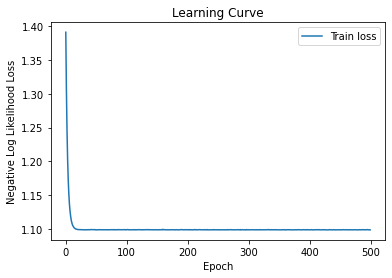

In [64]:
plt.plot(epoch_losses, label='Train loss')
plt.title("Learning Curve")
plt.ylabel("Negative Log Likelihood Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

We'll, let's see how good an average loss of ~1.10 is by making some predictions using our toy data `X` and assessing the accuracy.

In [65]:
def predict(X, nn):
    y_hat_probs = forward(X=X, nn=nn)
    y_hat_labels = np.argmax(y_hat_probs, axis=1)
    return y_hat_labels.reshape(-1, 1)

As we can see below we get ~33.6% accuracy which is right around random chance for 3 classes (1/3 chance per class). This is pretty bad.

In [66]:
from sklearn.metrics import accuracy_score

y_hat = predict(X, nn=nn)

acc = accuracy_score(y_hat, y)
print(f"Neural nework accuracy: {acc}")

Neural nework accuracy: 0.336


Notice, `y_hat` or the predictions is just predicting all data samples to belong to a single class. This means our model really isn't learning to do anything useful.

In [67]:
y_hat

array([[2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
    

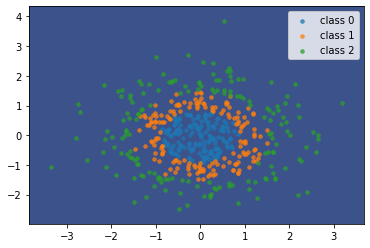

In [68]:
plot_fill_decision_boundary(X=X, y=y, predict=predict, nn=nn);

What is happening here? We'll one good way to begin to debug neural networks is by observing the average gradients for each layer. The gradients give us an insight into how much a layer's weights and biases are being changed/updated. We use the `plot_gradient_tracker()` function to plot the `W_grads_tracker` and `b_grads_tracker` which stored the absolute mean of EACH layer's weight and bias gradients for EACH epoch.

We use the absolute mean because negative values and positive values don't really matter here. We are interested in how much the gradient is changing on average, not the direction of the gradient which is what negative and positive signs indicate.

In [69]:
def plot_gradient_tracker(grad_track, title=''):
    for l in range(grad_track.shape[-1]):
        plt.plot(grad_track[:, l], label=f"Layer {l+1}")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Abosulte Mean Gradient")
    plt.legend()
    plt.show()

Below are the absolute means of EACH layer's weight gradients. Notice anything strange? For instance, take note of how the output layer's (layer 4) absolute mean is changing quite frequently and centered around .03 while ALL the other layers are quite static and essentially centered around 0.

While gradients shrinking (i.e., gradient values getting smaller) as they move from the output layer to the 1st hidden layer is normal. For example, the output layer and hidden layers close to the output layer tend to have higher variance in their gradients and larger average gradients. On the other hand, hidden layers closer to the input layer tend to have lower variance in their gradients and smaller average gradients.

While this is true in the below plot, notice that our gradients haven't shrunk, rather they have *vanished* as the gradient values have propagated backwards through the network such that all layers besides the output layer basically have near 0 gradients.

This problem is referred to as the [*vanishing gradient problem*](https://www.youtube.com/watch?v=qO_NLVjD6zE). Recall, this occurs when the gradient values are really small such that when we multiple small gradients over and over again, the product of really small numbers is itself an even smaller number. This leads to gradients being near 0 and in turn a gradient near 0 then can not update the values of the weights or biases.

The issue specifically arises with the sigmoid  and tanh activation functions as the sigmoid activation function saturates near 0 and 1 and the tanh activation function saturates near -1 and 1. What this means is that the output of the these gets saturated near the boundaries of the function  (0/1 or -1/1) where the derivative is near zero (i.e., a really small number). Recall, the derivative of the sigmoid is multiplied by the gradient as it flows backwards through the network causing the gradient value to shrink. Repeat this process for many layers and the value of gradient deprecates to near 0 as we near layers closer to the input layer.

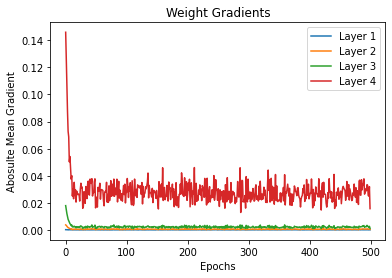

In [70]:
plot_gradient_tracker(W_grads_tracker, title='Weight Gradients')

Notice this same vanishing gradient problem is observed in the bias gradients as well.

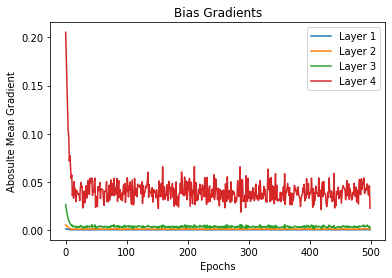

In [71]:
plot_gradient_tracker(b_grads_tracker, title='Bias Gradients')

### ReLU: Overcoming vanishing gradient

For a long time, this problem of the vanishing gradient plagued neural networks and was one of the reasons people never explored multi-layer neuron networks with 3 or more layers (i.e., deep neural networks).
However, the "invention" of the ReLU activation function helped to alleviate this problem of vanishing gradients.

Let's rerun training of the SAME network but now with the ReLU activation used for the hidden neurons.

In [72]:
np.random.seed(0)

# Get mult-class data
X, y = multi_class_data()
# Convert labels to onehot
y_oh = onehot(y)

# nn hyper-parameters
neurons_per_layer = [10, 10, 10, 3]
g_hidden = ReLU
g_output = Softmax

# Gradient descent hyper-parameters
alpha=.01
batch_size=64
epochs=500

# Initialize nn layers
nn = init_neural_network(
    n_input_features=X.shape[1], 
    neurons_per_layer=neurons_per_layer,
    g_hidden=g_hidden,
    g_output=g_output
)

# Train neural network
output = fit(
    X=X, 
    y=y_oh,
    nn=nn,
    alpha=alpha,
    batch_size=batch_size,
    epochs=epochs
)
epoch_losses, W_grads_tracker, b_grads_tracker = output

Epoch: 1
	Training NLL: 1.3125495202827397
Epoch: 2
	Training NLL: 1.13544169605158
Epoch: 3
	Training NLL: 1.1070242075890042
Epoch: 4
	Training NLL: 1.094685752279944
Epoch: 5
	Training NLL: 1.0889023358426413
Epoch: 6
	Training NLL: 1.0837808220145528
Epoch: 7
	Training NLL: 1.0805426716431952
Epoch: 8
	Training NLL: 1.076146906445475
Epoch: 9
	Training NLL: 1.073545312118244
Epoch: 10
	Training NLL: 1.0693943813467985
Epoch: 11
	Training NLL: 1.067247147463113
Epoch: 12
	Training NLL: 1.0643976368865136
Epoch: 13
	Training NLL: 1.0638529541873376
Epoch: 14
	Training NLL: 1.0605225997603425
Epoch: 15
	Training NLL: 1.0594252403552782
Epoch: 16
	Training NLL: 1.0566799900287
Epoch: 17
	Training NLL: 1.0552716785530698
Epoch: 18
	Training NLL: 1.0527134803286218
Epoch: 19
	Training NLL: 1.0521010042358212
Epoch: 20
	Training NLL: 1.0498853237180605
Epoch: 21
	Training NLL: 1.048455109733186
Epoch: 22
	Training NLL: 1.0465125895751373
Epoch: 23
	Training NLL: 1.045234070426487
Epoch: 2

	Training NLL: 0.3461889460706989
Epoch: 207
	Training NLL: 0.3431992115375736
Epoch: 208
	Training NLL: 0.34120866233127645
Epoch: 209
	Training NLL: 0.3382374788975508
Epoch: 210
	Training NLL: 0.33537540624812656
Epoch: 211
	Training NLL: 0.3326395594290171
Epoch: 212
	Training NLL: 0.3315085314539038
Epoch: 213
	Training NLL: 0.3274307346905235
Epoch: 214
	Training NLL: 0.3258284011860583
Epoch: 215
	Training NLL: 0.3236743009514392
Epoch: 216
	Training NLL: 0.3197795813903777
Epoch: 217
	Training NLL: 0.3181714644272168
Epoch: 218
	Training NLL: 0.31507151437634917
Epoch: 219
	Training NLL: 0.31356033512933057
Epoch: 220
	Training NLL: 0.3113475953396641
Epoch: 221
	Training NLL: 0.31024526342045183
Epoch: 222
	Training NLL: 0.3060270095939635
Epoch: 223
	Training NLL: 0.30480230809094605
Epoch: 224
	Training NLL: 0.3036358354537075
Epoch: 225
	Training NLL: 0.29927851886285084
Epoch: 226
	Training NLL: 0.29767976751106195
Epoch: 227
	Training NLL: 0.2957819623810826
Epoch: 228
	T

	Training NLL: 0.139665764413332
Epoch: 410
	Training NLL: 0.14010250426754522
Epoch: 411
	Training NLL: 0.14105893328662283
Epoch: 412
	Training NLL: 0.14017111749458266
Epoch: 413
	Training NLL: 0.13987589919156698
Epoch: 414
	Training NLL: 0.1395269749358716
Epoch: 415
	Training NLL: 0.14025318202869227
Epoch: 416
	Training NLL: 0.13775704440331477
Epoch: 417
	Training NLL: 0.1387289619255465
Epoch: 418
	Training NLL: 0.1378182985409189
Epoch: 419
	Training NLL: 0.1405870838367917
Epoch: 420
	Training NLL: 0.13823526160858138
Epoch: 421
	Training NLL: 0.1354505461343634
Epoch: 422
	Training NLL: 0.14275727310191605
Epoch: 423
	Training NLL: 0.13557555880663147
Epoch: 424
	Training NLL: 0.13756340655343963
Epoch: 425
	Training NLL: 0.1370643942852482
Epoch: 426
	Training NLL: 0.1366909907169016
Epoch: 427
	Training NLL: 0.13674732546881208
Epoch: 428
	Training NLL: 0.134420018464935
Epoch: 429
	Training NLL: 0.13435118216611852
Epoch: 430
	Training NLL: 0.136998987334247
Epoch: 431
	

Notice that the losses printed above and displayed below, in the plot, show that our neural network doesn't flatten out till approximately  ~.16 average loss per epoch. This is MUCH better than before and indicates the network is now learning! 

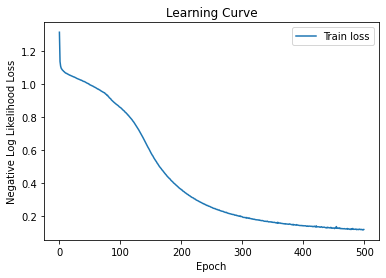

In [73]:
plt.plot(epoch_losses, label='Train loss')
plt.title("Learning Curve")
plt.ylabel("Negative Log Likelihood Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

Looking at the accuracy we receive ~96%. Additionally, the decision boundary, plotted below, shows that the network has learned to separate the data pretty well!

In [74]:
y_hat = predict(X=X, nn=nn)

acc = accuracy_score(y_hat, y)
print(f"Neural nework accuracy: {acc}")

Neural nework accuracy: 0.97


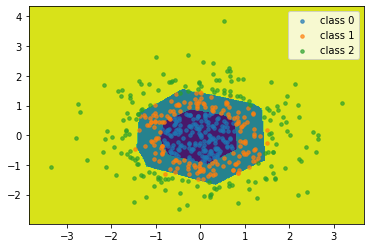

In [75]:
plot_fill_decision_boundary(X=X, y=y, predict=predict, nn=nn);

Finally, if we look at the below plots of the absolute mean gradients for the weights and biases we can see that ALL the layers have variance in their gradients and the gradients are no longer centered around 0!

Why does ReLU activation function help alleviate the vanishing gradient problem? Well, the answer is simple, recall that the ReLU function squashes values between 0 and infinity. This means there is only 1 point where ReLU can saturate and that is when the linear combination value of a neuron is less than zero. Further, since the derivative of the ReLU is either 0 or the input value itself (i.e., the value of linear combination) then derivatives are usually larger values. These two aspects help prevent the ReLU for saturating as much as the sigmoid or tanh activation functions.

However, ReLU does run into it's own and similar problem called the *Dying ReLU Problem* where most of the neurons in a network become "saturated" at 0 such that they only output 0 and their derivatives are 0. Thus, many different versions of the ReLU activation function have been developed to over come this problem as well. However, note this problem is actually much less common in practice!

Additionally, ReLU can suffer from the opposite of the vanishing gradient problem. This problem is called the *exploding gradient problem* where the gradients get larger as it moves through the network. Notice, we can see this starting to occur as the weight gradients for the earlier layers become larger than the later layers (this is opposite to what we normally expect)!

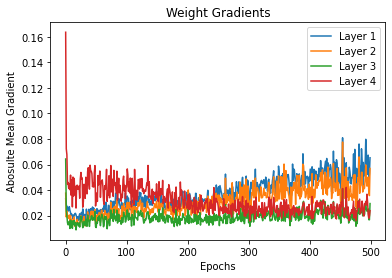

In [76]:
plot_gradient_tracker(W_grads_tracker, title='Weight Gradients')

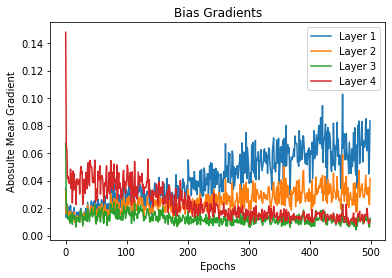

In [77]:
plot_gradient_tracker(b_grads_tracker, title='Bias Gradients')